# Install packages for analysis

In [1]:
!pip install wordcloud

# Imports

In [2]:
import pandas as pd
import numpy as np
import requests
import urllib
import tweepy
import json
import os
import seaborn as sns
from tweepy import OAuthHandler
from timeit import default_timer as timer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Gather

### Import the data `twitter-archive-enhanced.csv`




In [3]:
local_df = pd.read_csv('twitter-archive-enhanced.csv')
local_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
local_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Import the JSON file from Twitter API (`tweet_json.txt` already provide by Udacity)

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = local_df.tweet_id.values
len(tweet_ids)

2356

In [6]:
###################################################
###### PROVIDED BY UDACITY. DON'T NEED RUN! #######
###################################################

os.listdir('.')

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

['twitter_archive_master.csv',
 'wrangle_act.ipynb',
 'act_report.pdf',
 '.ipynb_checkpoints',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'image_predictions.tsv',
 'wrangle_report.pdf']

In [7]:
# Append the JSON to a list
tweets = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweets.append(json.loads(line))

In [8]:
data_ = []

for tweet in tweets:
    
    tweet_id = tweet['id']
    retweet_count = tweet['retweet_count']
    retweeted = tweet['retweeted']
    favorite_count = tweet['favorite_count']
    followers_count = tweet['user']['followers_count']
    text = tweet['full_text']
    source = tweet['source']
    
    data_.append({'id':tweet_id,
                  'text': text,
                  'source': source,
                  'retweeted': retweeted,
                  'retweet_count': retweet_count,
                  'favorite_count': favorite_count,
                  'followers_count': followers_count})
    
tweets_api_df = pd.DataFrame(data_, columns=['id', 'text', 'source', 'retweeted',
                                             'retweet_count', 'favorite_count', 'followers_count'])


In [9]:
tweets_api_df.head()

,id,text,source,retweeted,retweet_count,favorite_count,followers_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",False,8853,39467,3200889
1,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",False,6514,33819,3200889
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",False,4328,25461,3200889
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",False,8964,42908,3200889
4,891327558926688256,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",False,9774,41048,3200889


In [10]:
tweets_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
id                 2354 non-null int64
text               2354 non-null object
source             2354 non-null object
retweeted          2354 non-null bool
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: bool(1), int64(4), object(2)
memory usage: 112.7+ KB


### Import images prediction file `image-predictions.tsv` using request

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
os.listdir('.')

['twitter_archive_master.csv',
 'wrangle_act.ipynb',
 'act_report.pdf',
 '.ipynb_checkpoints',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'image_predictions.tsv',
 'wrangle_report.pdf']

In [12]:
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1163,735137028879360001,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,1,Walker_hound,0.413535,True,beagle,0.233891,True,English_foxhound,0.164943,True
581,678774928607469569,https://pbs.twimg.com/media/CWt-MNIWEAAUC9S.jpg,1,Pembroke,0.194681,True,toy_poodle,0.121821,True,Pomeranian,0.096843,True
421,674045139690631169,https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg,1,robin,0.369661,False,rhinoceros_beetle,0.110607,False,European_fire_salamander,0.043178,False
1096,720059472081784833,https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg,1,Mexican_hairless,0.451852,True,redbone,0.254884,True,Italian_greyhound,0.094818,True
524,676603393314578432,https://pbs.twimg.com/media/CWPHMqKVAAAE78E.jpg,1,whippet,0.877021,True,Great_Dane,0.034182,True,boxer,0.028404,True


In [13]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Assess

### Visual Assessment

In [14]:
local_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
tweets_api_df

,id,text,source,retweeted,retweet_count,favorite_count,followers_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",False,8853,39467,3200889
1,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",False,6514,33819,3200889
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",False,4328,25461,3200889
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",False,8964,42908,3200889
4,891327558926688256,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",False,9774,41048,3200889
5,891087950875897856,Here we have a majestic great white breaching ...,"<a href=""http://twitter.com/download/iphone"" r...",False,3261,20562,3200889
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,"<a href=""http://twitter.com/download/iphone"" r...",False,2158,12041,3200889
7,890729181411237888,When you watch your owner call another dog a g...,"<a href=""http://twitter.com/download/iphone"" r...",False,16716,56848,3200889
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,"<a href=""http://twitter.com/download/iphone"" r...",False,4429,28226,3200889
9,890240255349198849,This is Cassie. She is a college pup. Studying...,"<a href=""http://twitter.com/download/iphone"" r...",False,7711,32467,3200889


In [16]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic Assessment
#### `local_df` table

In [17]:
local_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
local_df[local_df.expanded_urls.isnull()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
234,847617282490613760,8.476062e+17,4.196984e+09,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@breaannanicolee PUPDATE: Cannon has a heart ...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
218,850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None


In [19]:
# Check duplicate
local_df.duplicated().sum()

0

In [20]:
# Check the amount of NaN values in each column
local_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
local_df.loc[(local_df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None


In [22]:
local_df.text.sample(3)

268     Here we have some incredible doggos for #K9Vet...
2036    I'm just going to leave this one here as well....
321     This is Wilson. He's aware that he has somethi...
Name: text, dtype: object

#### `tweets_api_df` table

In [23]:
tweets_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
id                 2354 non-null int64
text               2354 non-null object
source             2354 non-null object
retweeted          2354 non-null bool
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: bool(1), int64(4), object(2)
memory usage: 112.7+ KB


In [24]:
tweets_api_df.duplicated().sum()

0

In [25]:
tweets_api_df.sample(5)

,id,text,source,retweeted,retweet_count,favorite_count,followers_count
1406,699072405256409088,ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,"<a href=""http://twitter.com/download/iphone"" r...",False,1325,3296,3200950
1784,677573743309385728,This is Sandy. He's sexually confused. Thinks ...,"<a href=""http://twitter.com/download/iphone"" r...",False,819,2322,3200953
1537,689661964914655233,Meet Luca. He's a Butternut Scooperfloof. Glor...,"<a href=""http://twitter.com/download/iphone"" r...",False,1052,3501,3200951
393,825829644528148480,This is Toby. He just found out you only prete...,"<a href=""http://twitter.com/download/iphone"" r...",False,2848,14025,3200893
2110,670435821946826752,Two unbelievably athletic dogs here. Great for...,"<a href=""http://twitter.com/download/iphone"" r...",False,570,1127,3201009


In [26]:
tweets_api_df.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [27]:
tweets_api_df.text.sample(3)

640     This is Juno. She spooked me up real good, but...
1554    Say hello to Brad. His car probably has a spoi...
1277    Here's a pupper with magic eyes. Not wearing a...
Name: text, dtype: object

#### `image_predictions_df` table

In [28]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
737,687109925361856513,https://pbs.twimg.com/media/CYka1NTWMAAOclP.jpg,2,borzoi,0.883086,True,whippet,0.022934,True,Saluki,0.021606,True
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.190292,False,projectile,0.149064,False,fountain,0.066047,False
329,672082170312290304,https://pbs.twimg.com/media/CVO3KodXAAAj1de.jpg,1,hamster,0.132440,False,toy_poodle,0.123962,True,bubble,0.056212,False


In [30]:
image_predictions_df.duplicated().sum()

0

### Quality

- **First of all, replace "None" string  values to np.nan**

#### Duplicated quality issues
- Rename tweet_id to id for standardize (local_df, image_predictions_df)
- Erroneous datatype assigned to tweet_id/id column (int -> str)
- Cleaning the values of source column (local_df, tweets_api_df)
- Removing retweets and replies (local_df, tweets_api_df)
- The information of text column is truncated to 50 characters, we could lost information to extract from the text (local_df, tweets_api_df)

#### local_df table
- Erroneous datatypes to timestamp
- Rename timestamp to date

#### tweets_api_df table
- Extracting and cleaning ratings properly from the text column

#### image_predictions_df
- Adjusting the letter case on each value in the prediction columns to have a consistent format
- Providing more descriptive name for the columns about the model predictions


### Tidiness
- Remove unnecessary columns
    - local_df
        - source (Duplicate with tweets_api_df)
        - in_reply_to_status_id
        - in_reply_to_user_id
        - text
        - retweeted_status_id
        - retweeted_status_user_id
        - retweeted_status_timestamp
        - rating_numerator (Since we extract on the tweets_api_df)
        - rating_denominator (Since we extract on the tweets_api_df)
        - expanded_urls	
    - tweets_api_df
        - text
        - retweeted    
    - image_predictions_df
        - img_num

- The last four columns in `local_df` table (doggo, floofer, pupper, puppo) should be one column contain these values
    - Remove original columns
    - Replace " " to np.nan on the new column

- Combine all tables

# Clean

In [31]:
local_df_clean = local_df.copy()
tweets_api_df_clean = tweets_api_df.copy()
image_predictions_df_clean = image_predictions_df.copy()

### Quality

**Replace "None" values to np.nan**

#### Define
Filter the "None" values and replace them to np.nan

In [32]:
local_df_clean.replace(to_replace=["None"], value=np.nan, inplace=True)
tweets_api_df_clean.replace(to_replace=["None"], value=np.nan, inplace=True)
image_predictions_df_clean.replace(to_replace=["None"], value=np.nan, inplace=True)

#### Test

In [33]:
print('None values in local_df_clean:', local_df_clean[local_df_clean == "None"].sum().sum())
print('None values in tweets_api_df_clean:', tweets_api_df_clean[tweets_api_df_clean == "None"].sum().sum())
print('None values in image_predictions_df_clean:', image_predictions_df_clean[image_predictions_df_clean == "None"].sum().sum())

None values in local_df_clean: 0.0
None values in tweets_api_df_clean: 0.0
None values in image_predictions_df_clean: 0.0


**`(local_df_clean, image_predictions_df_clean)`: Rename tweet_id to id for standardize**

##### Define
Rename the columns in both dataset with pandas method

In [34]:
local_df_clean.rename(columns={'tweet_id':'id'}, inplace=True)
image_predictions_df_clean.rename(columns={'tweet_id':'id'}, inplace=True)

#### Test

In [35]:
local_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
id                            2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

In [36]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
id         2075 non-null int64
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**`(All tables)`:Erroneous datatype assigned to tweet_id/id column (int -> str)**

#### Define
Change the datatype from int to str in all tables with pandas astype method

In [37]:
local_df_clean['id'] = local_df_clean.id.astype('str')
tweets_api_df_clean['id'] = tweets_api_df_clean.id.astype('str')
image_predictions_df_clean['id'] = image_predictions_df_clean.id.astype('str')

#### Test

In [38]:
local_df_clean.id.dtype, tweets_api_df_clean.id.dtype, image_predictions_df_clean.id.dtype

(dtype('O'), dtype('O'), dtype('O'))

**`(local_df_clean, tweets_api_df_clean)`: Cleaning the values of `source` column**

#### Define
Cleaning those values with extract regular expressions

In [39]:
# Thanks for https://stackoverflow.com/a/2076356

local_df_clean['source'] = local_df_clean.source.str.extract('"([^"]*)"')
tweets_api_df_clean['source'] = tweets_api_df_clean.source.str.extract('"([^"]*)"')

#### Test

In [40]:
local_df_clean.source.sample(3)

1442    http://twitter.com/download/iphone
2022    http://twitter.com/download/iphone
508     http://twitter.com/download/iphone
Name: source, dtype: object

In [41]:
tweets_api_df_clean.source.sample(3)

1054    http://twitter.com/download/iphone
1770    http://twitter.com/download/iphone
1309    http://twitter.com/download/iphone
Name: source, dtype: object

**`(local_df_clean, tweets_api_df_clean)`:Removing retweets and replies (local_df, tweets_api_df)**

#### Define
Filter the retweets and replies that don't are NaN values and remove them

In [42]:
local_df_clean.retweeted_status_id.notnull().sum()

181

In [43]:
local_df_clean.in_reply_to_status_id.notnull().sum()

78

In [44]:
tweets_api_df_clean = tweets_api_df_clean[tweets_api_df_clean.retweeted == False]
local_df_clean = local_df_clean[local_df_clean.retweeted_status_id.isnull()]
local_df_clean = local_df_clean[local_df_clean.in_reply_to_status_id.isnull()]

#### Test

In [45]:
retweets_local_df_clean = local_df_clean.retweeted_status_id.notnull().sum()
replies_local_df_clean = local_df_clean.in_reply_to_status_id.notnull().sum()
retweets_tweets_api_df_clean = tweets_api_df_clean[tweets_api_df_clean.retweeted == True].shape[0]

retweets_local_df_clean, replies_local_df_clean, retweets_tweets_api_df_clean

(0, 0, 0)

**`(local_df_clean, tweets_api_df_clean)`:The information of text column is truncated to 50 characters, we could lost information to extract from the text**

#### Define
Use the set options of pandas

In [46]:
pd.set_option('display.max_colwidth', -1)

#### Test

In [47]:
local_df_clean.text.sample(3)

470    This is Timber. He misses Christmas. Specifically the presents part. 12/10 cheer pup Timber https://t.co/dVVavqpeF9                                               
796    This is Chip. He's a pupholder. Comes with the car. Requires frequent pettings. Shifts for you. 10/10 innovative af https://t.co/hG5WYT9ECn                       
4      This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [48]:
tweets_api_df_clean.text.sample(3)

701     RT @dog_rates: This is Scout. He really wants to kiss himself. H*ckin inappropriate. 11/10 narcissistic af https://t.co/x0gV2Ck3AD         
2033    This is Oscar. He's ready for Christmas. 11/10 https://t.co/TON0Irzgwr                                                                     
2242    This is Erik. He's fucken massive. But also kind. Let's people hug him for free. Looks soft. 11/10 I would hug Erik https://t.co/MT7Q4aDQS1
Name: text, dtype: object

**`local_df_clean`: Erroneous datatypes to timestamp**

#### Define
Change the datatype with pandas function

In [49]:
local_df_clean['timestamp'] = pd.to_datetime(local_df_clean['timestamp'])

#### Test

In [50]:
local_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
id                            2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(4),

In [51]:
local_df_clean.timestamp.sample(1)

1342   2016-03-02 00:05:17
Name: timestamp, dtype: datetime64[ns]

**`local_df_clean`: Rename timestamp to date**

#### Define
Rename that columns with pandas

In [52]:
local_df_clean.rename(columns={'timestamp': 'date'}, inplace=True)

#### Test

In [53]:
local_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
id                            2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
date                          2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(4),

**`tweets_api_df_clean`: Extracting and cleaning ratings properly from the text column**

#### Define
Use regular expression to extract the rating from text column and cleaning rating_numerator column properly

In [54]:
rating = tweets_api_df_clean['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
tweets_api_df_clean = tweets_api_df_clean.join(rating)
tweets_api_df_clean.rename(columns={0: 'rating_numerator', 1: 'rating_denominator'}, inplace=True)

#### Test

In [55]:
tweets_api_df_clean.sample(3)

,id,text,source,retweeted,retweet_count,favorite_count,followers_count,rating_numerator,rating_denominator
1952,673656262056419329,This is Albert AKA King Banana Peel. He's a kind ruler of the kitchen. Very jubilant pupper. 10/10 overall great dog https://t.co/PN8hxgZ9We,http://twitter.com/download/iphone,False,265,769,3201004,10,10
2338,666099513787052032,Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,http://twitter.com/download/iphone,False,73,164,3201018,8,10
1848,675740360753160193,Here's a pupper licking in slow motion. 12/10 please enjoy https://t.co/AUJi8ujxw9,http://twitter.com/download/iphone,False,388,1257,3201002,12,10


In [56]:
tweets_api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 9 columns):
id                    2354 non-null object
text                  2354 non-null object
source                2354 non-null object
retweeted             2354 non-null bool
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
followers_count       2354 non-null int64
rating_numerator      2354 non-null object
rating_denominator    2354 non-null object
dtypes: bool(1), int64(3), object(5)
memory usage: 167.8+ KB


**`image_predictions_df_clean`:Adjusting the letter case on each value in the prediction columns to have a consistent format**

#### Define
Use the pandas method for string

In [57]:
image_predictions_df_clean['p1'] = image_predictions_df_clean['p1'].str.lower()
image_predictions_df_clean['p2'] = image_predictions_df_clean['p2'].str.lower()
image_predictions_df_clean['p3'] = image_predictions_df_clean['p3'].str.lower()

#### Test

In [58]:
image_predictions_df_clean.sample(5)

,id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
482,675372240448454658,https://pbs.twimg.com/media/CV9nd30XAAAEba5.jpg,1,chihuahua,0.416385,True,west_highland_white_terrier,0.102933,True,samoyed,0.087300,True
1361,761227390836215808,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,cougar,0.306512,False,french_bulldog,0.280802,True,boxer,0.054523,True
291,671182547775299584,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,1,rottweiler,0.331179,True,kelpie,0.218601,True,appenzeller,0.182520,True
1824,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,american_staffordshire_terrier,0.012731,True,staffordshire_bullterrier,0.007039,True
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,pomeranian,0.933457,True,samoyed,0.057221,True,west_highland_white_terrier,0.000904,True


**`image_predictions_df_clean`: Providing more descriptive name for the columns about the model predictions**

#### Define
Create dictionary with the new name of the columns and use pandas to rename

In [59]:
new_name_columns = {'p1': 'prediction_1',
                    'p1_conf': 'prediction_1_confidence',
                    'p1_dog': 'prediction_1_isdog',
                    'p2': 'prediction_2',
                    'p2_conf': 'prediction_2_confidence',
                    'p2_dog': 'prediction_2_isdog',
                    'p3': 'prediction_3',
                    'p3_conf': 'prediction_3_confidence',
                    'p3_dog': 'prediction_3_isdog'}

image_predictions_df_clean.rename(columns=new_name_columns, inplace=True)

#### Test

In [60]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
id                         2075 non-null object
jpg_url                    2075 non-null object
img_num                    2075 non-null int64
prediction_1               2075 non-null object
prediction_1_confidence    2075 non-null float64
prediction_1_isdog         2075 non-null bool
prediction_2               2075 non-null object
prediction_2_confidence    2075 non-null float64
prediction_2_isdog         2075 non-null bool
prediction_3               2075 non-null object
prediction_3_confidence    2075 non-null float64
prediction_3_isdog         2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tidiness

**`local_df_clean`: Remove unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator)**

#### Define
Remove the rest of the columns that yet not be removed and will not be important for our analysis

In [61]:
local_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [62]:
local_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
id         2097 non-null object
date       2097 non-null datetime64[ns]
name       1494 non-null object
doggo      83 non-null object
floofer    10 non-null object
pupper     230 non-null object
puppo      24 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 131.1+ KB


**`tweets_api_df_clean`: Remove unnecessary columns (text, retweeted)**

#### Define
Remove the columns with pandas

In [63]:
tweets_api_df_clean.drop(columns=['text','retweeted'], axis=1, inplace=True)

#### Test

In [64]:
tweets_api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 7 columns):
id                    2354 non-null object
source                2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
followers_count       2354 non-null int64
rating_numerator      2354 non-null object
rating_denominator    2354 non-null object
dtypes: int64(3), object(4)
memory usage: 147.1+ KB


**`image_predictions_df_clean`: Remove unnecessary columns (img_num)**

#### Define
Remove the column with pandas

In [65]:
image_predictions_df_clean.drop(columns=['img_num'], axis=1, inplace=True)

#### Test

In [66]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
id                         2075 non-null object
jpg_url                    2075 non-null object
prediction_1               2075 non-null object
prediction_1_confidence    2075 non-null float64
prediction_1_isdog         2075 non-null bool
prediction_2               2075 non-null object
prediction_2_confidence    2075 non-null float64
prediction_2_isdog         2075 non-null bool
prediction_3               2075 non-null object
prediction_3_confidence    2075 non-null float64
prediction_3_isdog         2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


**`local_df_clean`: The last four columns in local_df table (doggo, floofer, pupper, puppo) should be one column contain these values**

In [67]:
local_df_clean.loc[(local_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].notnull()
                 ).sum(axis=1) > 1]

,id,date,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02,NaN,doggo,NaN,NaN,puppo
200,854010172552949760,2017-04-17 16:34:26,NaN,doggo,floofer,NaN,NaN
460,817777686764523521,2017-01-07 16:59:28,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,2016-12-12 00:29:28,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,2016-11-22 17:28:25,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,2016-10-11 00:34:48,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,2016-09-29 01:42:20,NaN,doggo,NaN,pupper,NaN
889,759793422261743616,2016-07-31 16:50:42,Maggie,doggo,NaN,pupper,NaN
956,751583847268179968,2016-07-09 01:08:47,NaN,doggo,NaN,pupper,NaN
1063,741067306818797568,2016-06-10 00:39:48,just,doggo,NaN,pupper,NaN


In [68]:
# Thanks to https://stackoverflow.com/a/45787857

local_df_clean['dog_stage'] = local_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [69]:
local_df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [70]:
local_df_clean.replace(to_replace=[""], value=np.nan, inplace=True)

#### Test

In [71]:
local_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 4 columns):
id           2097 non-null object
date         2097 non-null datetime64[ns]
name         1494 non-null object
dog_stage    336 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 81.9+ KB


In [72]:
local_df_clean.sample(5)

,id,date,name,dog_stage
1918,674271431610523648,2015-12-08 16:56:51,NaN,NaN
2008,672256522047614977,2015-12-03 03:30:19,NaN,NaN
748,779377524342161408,2016-09-23 17:50:56,NaN,pupper
376,828046555563323392,2017-02-05 01:04:17,Sailer,NaN
1615,685268753634967552,2016-01-08 01:16:17,Hubertson,pupper


In [73]:
local_df_clean.dog_stage.value_counts()

pupper           221
doggo            72 
puppo            23 
floofer          9  
doggo,pupper     9  
doggo,puppo      1  
doggo,floofer    1  
Name: dog_stage, dtype: int64

#### `Combine all tables`

#### Define
Combine all tables with pandas merge on ID

In [74]:
df_aux = pd.merge(left=local_df_clean, right=tweets_api_df_clean, how='right', left_on='id', right_on='id')
df_master = pd.merge(left=df_aux, right=image_predictions_df_clean, how='right', left_on='id', right_on='id')

#### Test

## Obs: I can change the NaN values to "None" so the columns will have the same number of observations, but I decided to keep the NaN values for better understanding the data for future analysis, that is why I have this inconsistence number of observations.

In [75]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
id                         2075 non-null object
date                       1971 non-null datetime64[ns]
name                       1447 non-null object
dog_stage                  303 non-null object
source                     2073 non-null object
retweet_count              2073 non-null float64
favorite_count             2073 non-null float64
followers_count            2073 non-null float64
rating_numerator           2073 non-null object
rating_denominator         2073 non-null object
jpg_url                    2075 non-null object
prediction_1               2075 non-null object
prediction_1_confidence    2075 non-null float64
prediction_1_isdog         2075 non-null bool
prediction_2               2075 non-null object
prediction_2_confidence    2075 non-null float64
prediction_2_isdog         2075 non-null bool
prediction_3               2075 non-null object
prediction_3_confiden

In [76]:
df_master

,id,date,name,dog_stage,source,retweet_count,favorite_count,followers_count,rating_numerator,rating_denominator,jpg_url,prediction_1,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog
0,892420643555336193,2017-08-01 16:23:56,Phineas,NaN,http://twitter.com/download/iphone,8853.0,39467.0,3200889.0,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,http://twitter.com/download/iphone,6514.0,33819.0,3200889.0,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Archie,NaN,http://twitter.com/download/iphone,4328.0,25461.0,3200889.0,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Darla,NaN,http://twitter.com/download/iphone,8964.0,42908.0,3200889.0,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Franklin,NaN,http://twitter.com/download/iphone,9774.0,41048.0,3200889.0,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,NaN,NaN,http://twitter.com/download/iphone,3261.0,20562.0,3200889.0,13,10,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Jax,NaN,http://twitter.com/download/iphone,2158.0,12041.0,3200889.0,13,10,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,NaN,NaN,http://twitter.com/download/iphone,16716.0,56848.0,3200889.0,13,10,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Zoey,NaN,http://twitter.com/download/iphone,4429.0,28226.0,3200889.0,13,10,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Cassie,doggo,http://twitter.com/download/iphone,7711.0,32467.0,3200889.0,14,10,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


# Storing, Analyzing, and Visualizing Data for this Project

## Storing

In [77]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analysis and Visualization

In [78]:
twitter_master_df = pd.read_csv('twitter_archive_master.csv')
twitter_master_df.head()

,id,date,name,dog_stage,source,retweet_count,favorite_count,followers_count,rating_numerator,rating_denominator,jpg_url,prediction_1,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog
0,892420643555336193,2017-08-01 16:23:56,Phineas,NaN,http://twitter.com/download/iphone,8853.0,39467.0,3200889.0,13.0,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,http://twitter.com/download/iphone,6514.0,33819.0,3200889.0,13.0,10.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Archie,NaN,http://twitter.com/download/iphone,4328.0,25461.0,3200889.0,12.0,10.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Darla,NaN,http://twitter.com/download/iphone,8964.0,42908.0,3200889.0,13.0,10.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Franklin,NaN,http://twitter.com/download/iphone,9774.0,41048.0,3200889.0,12.0,10.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


### Insight 1 
Let's check the mistakes when the top 1 prediction of the model didn't consider the image as a dog. For this I will set:
- False to `prediction_1_isdog` column

**Why didn't the model consider the image as a dog?**

Proportion: 0.2616867469879518


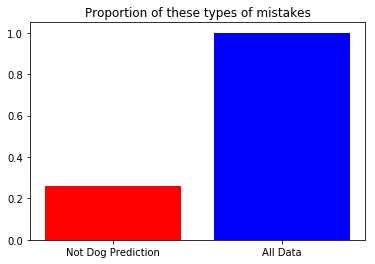

In [79]:
# Proportion of this situation
mistakes_df = twitter_master_df.query('prediction_1_isdog == False')
proportion_mistakes = mistakes_df.shape[0] / twitter_master_df.shape[0]
print('Proportion:', proportion_mistakes)

plt.bar([0, 1], [proportion_mistakes, 1], color=['red','blue'])
plt.title('Proportion of these types of mistakes')
plt.xticks([0,1], ['Not Dog Prediction', 'All Data'], fontsize=10);

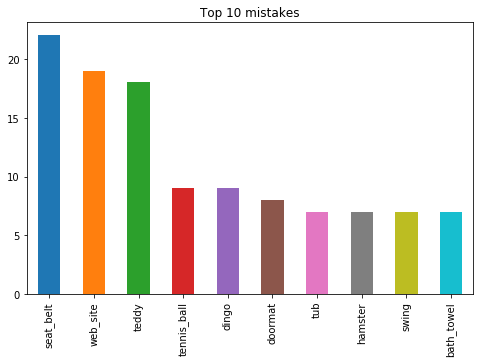

In [80]:
# Let's check the top 10 prediction mistakes made by the model and their frequency
mistakes_df.prediction_1.value_counts()[:10].plot(kind='bar', title='Top 10 mistakes', figsize=(8,5));

These types of mistakes is about 1/4 of the all dataset

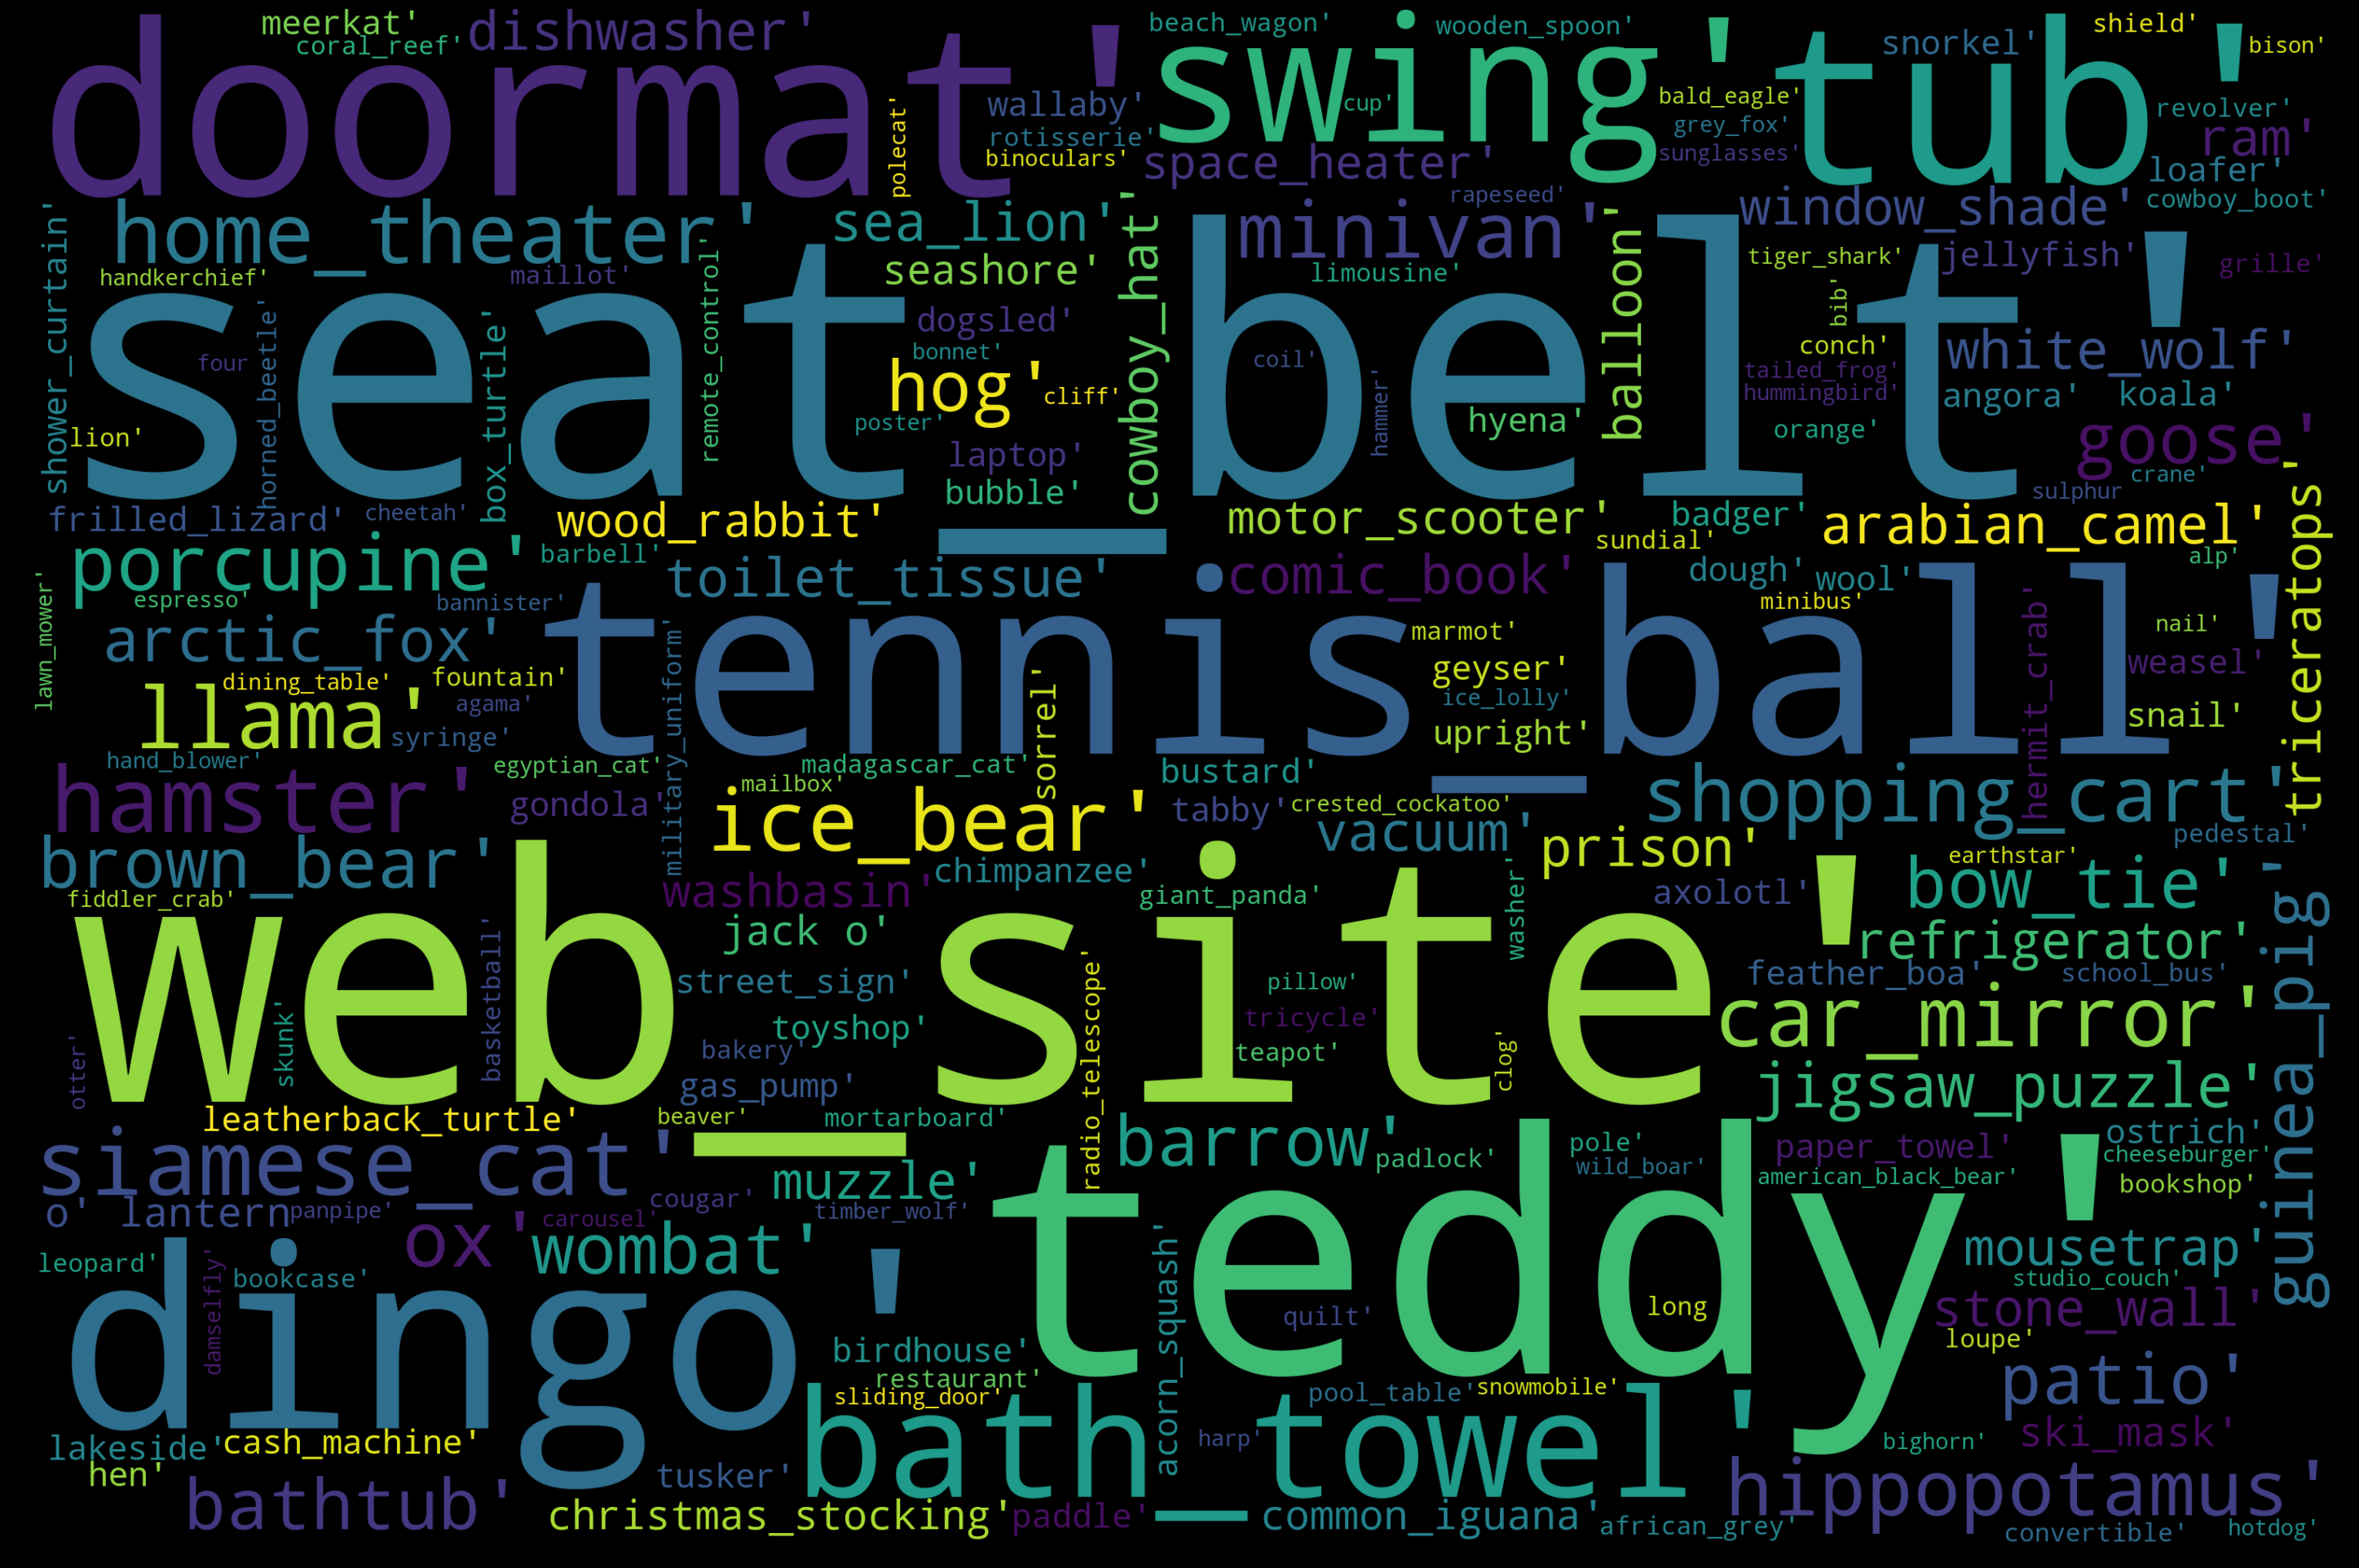

In [81]:
# Generate word clouds to check the values of these predictions

# Thanks to
# https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/

text = mistakes_df.prediction_1.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

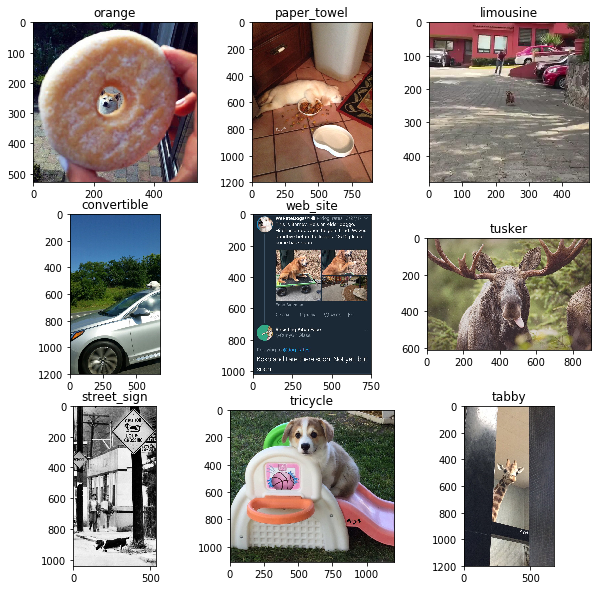

In [82]:
# Thanks to https://stackoverflow.com/a/46616645

fig=plt.figure(figsize=(10, 10))

columns = 3
rows = 3

images = mistakes_df.jpg_url.values[:9]
predictions = mistakes_df.prediction_1.values[:9]

for i in range(1, len(images) + 1):
    f = urllib.request.urlopen(images[i-1])
    a = plt.imread(f, format='jpg')
    fig.add_subplot(rows, columns, i)
    plt.title(predictions[i-1], fontsize=12)
    plt.imshow(a)
plt.show()

With those images, it is clear that some images are very hard for the model to predict correctly. The object predicted is part of the image and the model looked only at this object in the all image. Some of them are outliers, that is, images not related with dogs, but other animals.

### Insight 2:

Let's check the correlation of numeric features. For this we will consider the columns:

- rating_numerator (Since the ranking is done by this variable in principle)
- retweet_count
- favorite_count    
- followers_count 

**There is a correlation between the numeric features of our dataset?**

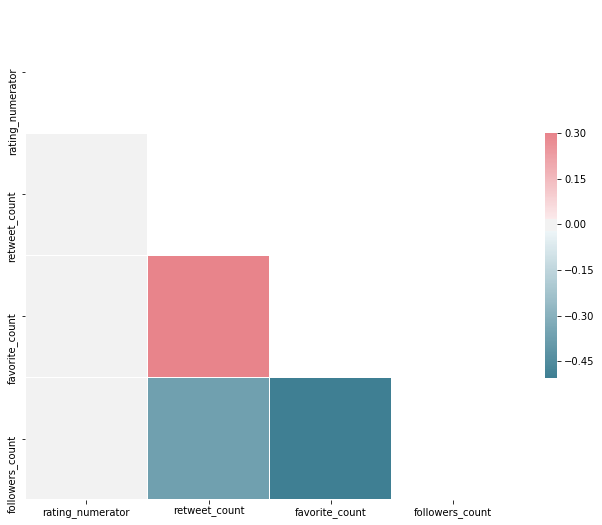

In [83]:
# Reference: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
numeric_features = twitter_master_df[['rating_numerator', 'retweet_count', 'favorite_count','followers_count']]
corr = numeric_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

We can observe that favorite_count feature have positive moderate correlation with retweet_count. The favorite_count have negative moderate correlation with followers_count and retweet_count have negative weak correlation with followers_count. None of them have correlation with rating_numerator

### Insight 3:

Let's check the most popular dog names.

**What are the most popular dog names?**

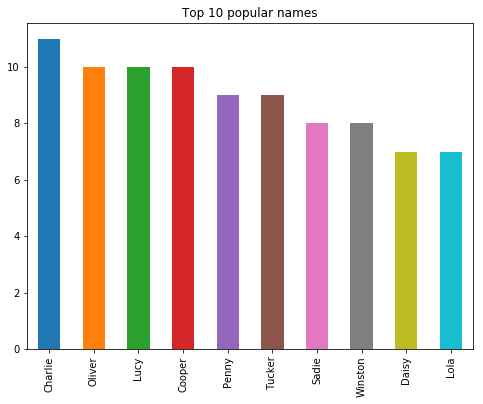

In [84]:
avaible_names_dog = twitter_master_df[twitter_master_df.name != "None"]
avaible_names_dog_without_outlier = avaible_names_dog[avaible_names_dog.name != "a"]
avaible_names_dog_without_outlier.name.value_counts()[:10].plot(kind='bar', title='Top 10 popular names', figsize=(8,6));

The most popular dog name is Charlie, followed by Cooper, Oliver, Lucy and so on. Other names like Penny, Sadie, Lola and a lot of more are also popular.